# 데이터 입력

In [ ]:
# 기본 데이터 정리 및 처리
import numpy as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# 전처리
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler

# 경고 제거 (판다스가 에러 메세지를 자주 만들어 내기 때문에 이를 일단 무시하도록 설정합니다.)
import sys
import warnings

import warnings
warnings.filterwarnings('ignore')

# train, test 나누기
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('bank-full.csv', sep =';')
df

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no  

[45211 rows x 17 columns]

# 전처리

## 종속변수 y를 수치형으로 바꿔주기. 
no를 0(정상)으로, yes를 1(이상)로 변환

In [ ]:
df.loc[df['y'] == 'no', 'y'] = 0
df.loc[df['y'] == 'yes', 'y'] = 1
# object 타입을 int64 타입으로 바꿔주기
df['y'] = df['y'].astype('int64')

## unknown값 처리
사실상 Null값과 같다고 판단. 전처리 진행.

### unknown값 확인

In [ ]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [ ]:
288/45211

0.006370131162770122

In [ ]:
df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [ ]:
1857/45211

0.04107407489327818

In [ ]:
df['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [ ]:
13020/45211

0.28798301298356593

In [ ]:
df['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [ ]:
36959/45211

0.8174780473778506

### unknown값 제거

poutcome은 너무 많아 열을 삭제하였음

In [ ]:
df.drop('poutcome', axis=1, inplace = True) # poutcome 변수 삭제

In [ ]:
df.loc[df['job'] == 'unknown']

age      job   marital education default  balance housing loan  \
4       33  unknown    single   unknown      no        1      no   no   
216     47  unknown   married   unknown      no       28      no   no   
354     59  unknown  divorced   unknown      no       27      no   no   
876     37  unknown    single   unknown      no      414     yes   no   
1072    29  unknown    single   primary      no       50     yes   no   
...    ...      ...       ...       ...     ...      ...     ...  ...   
44714   45  unknown   married  tertiary      no      406      no   no   
44742   64  unknown   married   unknown      no     2799      no   no   
44970   28  unknown    single   unknown      no      326      no   no   
45141   77  unknown   married   unknown      no      397      no   no   
45186   59  unknown   married   unknown      no     1500      no   no   

         contact  day month  duration  campaign  pdays  previous  y  
4        unknown    5   may       198         1     -1         0  0  
216      unknown    5   may       338         2     -1         0  0  
354      unknown    5   may       347         3     -1         0  0  
876      unknown    7   may       131         1     -1         0  0  
1072     unknown    7   may        50         2     -1         0  0  
...          ...  ...   ...       ...       ...    ...       ... ..  
44714   cellular    7   sep       314         1     -1         0  1  
44742  telephone    9   sep       378         4     -1         0  0  
44970   cellular   11   oct       450         1    231         1  1  
45141  telephone    8   nov       207         1    185         3  0  
45186   cellular   16   nov       280         1    104         2  0  

[288 rows x 16 columns]

In [ ]:
unknowndr1 = df[df['job'].str.contains('unknown')].index
df.drop(unknowndr1, inplace=True)

In [ ]:
df

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
5       35    management   married   tertiary      no      231     yes   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous  y  
0        unknown    5   may       261         1     -1         0  0  
1        unknown    5   may       151         1     -1         0  0  
2        unknown    5   may        76         1     -1         0  0  
3        unknown    5   may        92         1     -1         0  0  
5        unknown    5   may       139         1     -1         0  0  
...          ...  ...   ...       ...       ...    ...       ... ..  
45206   cellular   17   nov       977         3     -1         0  1  
45207   cellular   17   nov       456         2     -1         0  1  
45208   cellular   17   nov      1127         5    184         3  1  
45209  telephone   17   nov       508         4     -1         0  0  
45210   cellular   17   nov       361         2    188        11  0  

[44923 rows x 16 columns]

In [ ]:
df.loc[df['job'] == 'unknown']

Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, y]
Index: []

In [ ]:
45211-288

44923

unknown 없어짐을 확인.

In [ ]:
df.loc[df['education'] == 'unknown'] #1857 -> 1730

age          job  marital education default  balance housing loan  \
3       47  blue-collar  married   unknown      no     1506     yes   no   
13      58   technician  married   unknown      no       71     yes   no   
16      45       admin.   single   unknown      no       13     yes   no   
42      60  blue-collar  married   unknown      no      104     yes   no   
44      58      retired  married   unknown      no       96     yes   no   
...    ...          ...      ...       ...     ...      ...     ...  ...   
45098   44   technician   single   unknown      no    11115      no   no   
45109   78   management  married   unknown      no     1780     yes   no   
45129   46   technician  married   unknown      no     3308      no   no   
45150   65   management  married   unknown      no     2352      no   no   
45158   34      student   single   unknown      no     2321      no   no   

        contact  day month  duration  campaign  pdays  previous  y  
3       unknown    5   may        92         1     -1         0  0  
13      unknown    5   may        71         1     -1         0  0  
16      unknown    5   may        98         1     -1         0  0  
42      unknown    5   may        22         1     -1         0  0  
44      unknown    5   may       616         1     -1         0  0  
...         ...  ...   ...       ...       ...    ...       ... ..  
45098  cellular   25   oct       189         1    185         4  0  
45109  cellular   25   oct       211         2    185         7  1  
45129  cellular   27   oct       171         1     91         2  1  
45150  cellular    8   nov       354         3    188        13  0  
45158  cellular    9   nov       600         2     99         5  0  

[1730 rows x 16 columns]

In [ ]:
unknowndr2 = df[df['education'].str.contains('unknown')].index
df.drop(unknowndr2, inplace=True)

In [ ]:
df.loc[df['contact'] == 'unknown'] #13020 -> 12286

age            job  marital  education default  balance housing loan  \
0       58     management  married   tertiary      no     2143     yes   no   
1       44     technician   single  secondary      no       29     yes   no   
2       33   entrepreneur  married  secondary      no        2     yes  yes   
5       35     management  married   tertiary      no      231     yes   no   
6       28     management   single   tertiary      no      447     yes  yes   
...    ...            ...      ...        ...     ...      ...     ...  ...   
45061   30  self-employed   single  secondary      no     1031      no   no   
45062   58        retired  married    primary      no      742      no   no   
45122   40   entrepreneur   single   tertiary      no      262     yes  yes   
45135   53    blue-collar  married    primary      no     1294      no   no   
45136   53  self-employed  married   tertiary      no      730     yes   no   

       contact  day month  duration  campaign  pdays  previous  y  
0      unknown    5   may       261         1     -1         0  0  
1      unknown    5   may       151         1     -1         0  0  
2      unknown    5   may        76         1     -1         0  0  
5      unknown    5   may       139         1     -1         0  0  
6      unknown    5   may       217         1     -1         0  0  
...        ...  ...   ...       ...       ...    ...       ... ..  
45061  unknown   20   oct         7         1     -1         0  0  
45062  unknown   20   oct         5         1     -1         0  0  
45122  unknown   26   oct        17         1     -1         0  0  
45135  unknown   28   oct        71         1     -1         0  0  
45136  unknown    2   nov        18         1    368         2  0  

[12286 rows x 16 columns]

In [ ]:
unknowndr3 = df[df['contact'].str.contains('unknown')].index
df.drop(unknowndr3, inplace=True)

In [ ]:
df # 45211 -> 30907

age           job   marital  education default  balance housing loan  \
12657   27    management    single  secondary      no       35      no   no   
12658   54   blue-collar   married    primary      no      466      no   no   
12659   43   blue-collar   married  secondary      no      105      no  yes   
12660   31    technician    single  secondary      no       19      no   no   
12661   27    technician    single  secondary      no      126     yes  yes   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous  y  
12657   cellular    4   jul       255         1     -1         0  0  
12658   cellular    4   jul       297         1     -1         0  0  
12659   cellular    4   jul       668         2     -1         0  0  
12660  telephone    4   jul        65         2     -1         0  0  
12661   cellular    4   jul       436         4     -1         0  0  
...          ...  ...   ...       ...       ...    ...       ... ..  
45206   cellular   17   nov       977         3     -1         0  1  
45207   cellular   17   nov       456         2     -1         0  1  
45208   cellular   17   nov      1127         5    184         3  1  
45209  telephone   17   nov       508         4     -1         0  0  
45210   cellular   17   nov       361         2    188        11  0  

[30907 rows x 16 columns]

In [ ]:
df.reset_index(drop=True, inplace = True) #인덱스 재 정렬
df

age           job   marital  education default  balance housing loan  \
0       27    management    single  secondary      no       35      no   no   
1       54   blue-collar   married    primary      no      466      no   no   
2       43   blue-collar   married  secondary      no      105      no  yes   
3       31    technician    single  secondary      no       19      no   no   
4       27    technician    single  secondary      no      126     yes  yes   
...    ...           ...       ...        ...     ...      ...     ...  ...   
30902   51    technician   married   tertiary      no      825      no   no   
30903   71       retired  divorced    primary      no     1729      no   no   
30904   72       retired   married  secondary      no     5715      no   no   
30905   57   blue-collar   married  secondary      no      668      no   no   
30906   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous  y  
0       cellular    4   jul       255         1     -1         0  0  
1       cellular    4   jul       297         1     -1         0  0  
2       cellular    4   jul       668         2     -1         0  0  
3      telephone    4   jul        65         2     -1         0  0  
4       cellular    4   jul       436         4     -1         0  0  
...          ...  ...   ...       ...       ...    ...       ... ..  
30902   cellular   17   nov       977         3     -1         0  1  
30903   cellular   17   nov       456         2     -1         0  1  
30904   cellular   17   nov      1127         5    184         3  1  
30905  telephone   17   nov       508         4     -1         0  0  
30906   cellular   17   nov       361         2    188        11  0  

[30907 rows x 16 columns]

In [ ]:
# y 변수 저장
df_labels = df['y']

## 인코딩

### 범주형

#### Binary Encoding

In [ ]:
!pip install category_encoders
import category_encoders as ce

df_bi_cat = df[['month', 'job']]
df1 = ce.BinaryEncoder(cols = ['month']).fit_transform(df_bi_cat)
df2 = ce.BinaryEncoder(cols = ['job']).fit_transform(df1)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 534 kB/s 


In [ ]:
df1

month_0  month_1  month_2  month_3           job
0            0        0        0        1    management
1            0        0        0        1   blue-collar
2            0        0        0        1   blue-collar
3            0        0        0        1    technician
4            0        0        0        1    technician
...        ...      ...      ...      ...           ...
30902        0        1        0        0    technician
30903        0        1        0        0       retired
30904        0        1        0        0       retired
30905        0        1        0        0   blue-collar
30906        0        1        0        0  entrepreneur

[30907 rows x 5 columns]

In [ ]:
df2

month_0  month_1  month_2  month_3  job_0  job_1  job_2  job_3
0            0        0        0        1      0      0      0      1
1            0        0        0        1      0      0      1      0
2            0        0        0        1      0      0      1      0
3            0        0        0        1      0      0      1      1
4            0        0        0        1      0      0      1      1
...        ...      ...      ...      ...    ...    ...    ...    ...
30902        0        1        0        0      0      0      1      1
30903        0        1        0        0      1      0      0      1
30904        0        1        0        0      1      0      0      1
30905        0        1        0        0      0      0      1      0
30906        0        1        0        0      0      1      1      1

[30907 rows x 8 columns]

#### One Hot Encoding

In [ ]:
df_one_cat = df[['marital', 'education', 'default','housing',
       'loan', 'contact']] # month와 job을 제외한 범주형 변수 원핫인코딩

In [ ]:
cat_pipeline = Pipeline([
    ('1hot_encoder', OneHotEncoder(sparse=False)),
    ])
df_cat_tr = cat_pipeline.fit_transform(df_one_cat)

## Scaling

### 수치형

#### Robust Scaling

In [ ]:
df_std_big_num = df[['balance', 'duration', 'pdays']] # 표준편차가 큰 수치형 변수

In [ ]:
num_pipeline = Pipeline([
        ('rb_scaler', RobustScaler()),
    ])

df_num_tr = num_pipeline.fit_transform(df_std_big_num)

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = list(df_std_big_num) #키들(컬럼명)만 list로 반환
cat_attribs = list(df_one_cat)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])


In [ ]:
full_df = pd.DataFrame(full_pipeline.fit_transform(df))

In [ ]:
df_oth = df[['age', 'day', 'campaign', 'previous']] # 나머지 수치형 변수들

In [ ]:
X = pd.concat([full_df,df2,df_oth], axis =1)
X

0         1          2    3    4    5    6    7    8    9  ...  \
0     -0.307909  0.339450   0.000000  0.0  0.0  1.0  0.0  1.0  0.0  1.0  ...   
1     -0.004921  0.532110   0.000000  0.0  1.0  0.0  1.0  0.0  0.0  1.0  ...   
2     -0.258699  2.233945   0.000000  0.0  1.0  0.0  0.0  1.0  0.0  1.0  ...   
3     -0.319156 -0.532110   0.000000  0.0  0.0  1.0  0.0  1.0  0.0  1.0  ...   
4     -0.243937  1.169725   0.000000  0.0  0.0  1.0  0.0  1.0  0.0  1.0  ...   
...         ...       ...        ...  ...  ...  ...  ...  ...  ...  ...  ...   
30902  0.247452  3.651376   0.000000  0.0  1.0  0.0  0.0  0.0  1.0  1.0  ...   
30903  0.882953  1.261468   0.000000  1.0  0.0  0.0  1.0  0.0  0.0  1.0  ...   
30904  3.685062  4.339450  16.818182  0.0  1.0  0.0  0.0  1.0  0.0  1.0  ...   
30905  0.137083  1.500000   0.000000  0.0  1.0  0.0  0.0  1.0  0.0  1.0  ...   
30906  1.756063  0.825688  17.181818  0.0  1.0  0.0  0.0  1.0  0.0  1.0  ...   

       month_2  month_3  job_0  job_1  job_2  job_3  age  day  campaign  \
0            0        1      0      0      0      1   27    4         1   
1            0        1      0      0      1      0   54    4         1   
2            0        1      0      0      1      0   43    4         2   
3            0        1      0      0      1      1   31    4         2   
4            0        1      0      0      1      1   27    4         4   
...        ...      ...    ...    ...    ...    ...  ...  ...       ...   
30902        0        0      0      0      1      1   51   17         3   
30903        0        0      1      0      0      1   71   17         2   
30904        0        0      1      0      0      1   72   17         5   
30905        0        0      0      0      1      0   57   17         4   
30906        0        0      0      1      1      1   37   17         2   

       previous  
0             0  
1             0  
2             0  
3             0  
4             0  
...         ...  
30902         0  
30903         0  
30904         3  
30905         0  
30906        11  

[30907 rows x 29 columns]

In [ ]:
data = pd.concat([full_df,df2,df_oth, df_labels], axis =1)
data

0         1          2    3    4    5    6    7    8    9  ...  \
0     -0.307909  0.339450   0.000000  0.0  0.0  1.0  0.0  1.0  0.0  1.0  ...   
1     -0.004921  0.532110   0.000000  0.0  1.0  0.0  1.0  0.0  0.0  1.0  ...   
2     -0.258699  2.233945   0.000000  0.0  1.0  0.0  0.0  1.0  0.0  1.0  ...   
3     -0.319156 -0.532110   0.000000  0.0  0.0  1.0  0.0  1.0  0.0  1.0  ...   
4     -0.243937  1.169725   0.000000  0.0  0.0  1.0  0.0  1.0  0.0  1.0  ...   
...         ...       ...        ...  ...  ...  ...  ...  ...  ...  ...  ...   
30902  0.247452  3.651376   0.000000  0.0  1.0  0.0  0.0  0.0  1.0  1.0  ...   
30903  0.882953  1.261468   0.000000  1.0  0.0  0.0  1.0  0.0  0.0  1.0  ...   
30904  3.685062  4.339450  16.818182  0.0  1.0  0.0  0.0  1.0  0.0  1.0  ...   
30905  0.137083  1.500000   0.000000  0.0  1.0  0.0  0.0  1.0  0.0  1.0  ...   
30906  1.756063  0.825688  17.181818  0.0  1.0  0.0  0.0  1.0  0.0  1.0  ...   

       month_3  job_0  job_1  job_2  job_3  age  day  campaign  previous  y  
0            1      0      0      0      1   27    4         1         0  0  
1            1      0      0      1      0   54    4         1         0  0  
2            1      0      0      1      0   43    4         2         0  0  
3            1      0      0      1      1   31    4         2         0  0  
4            1      0      0      1      1   27    4         4         0  0  
...        ...    ...    ...    ...    ...  ...  ...       ...       ... ..  
30902        0      0      0      1      1   51   17         3         0  1  
30903        0      1      0      0      1   71   17         2         0  1  
30904        0      1      0      0      1   72   17         5         3  1  
30905        0      0      0      1      0   57   17         4         0  0  
30906        0      0      1      1      1   37   17         2        11  0  

[30907 rows x 30 columns]

In [ ]:
data.columns

Index([         0,          1,          2,          3,          4,          5,
                6,          7,          8,          9,         10,         11,
               12,         13,         14,         15,         16,  'month_0',
        'month_1',  'month_2',  'month_3',    'job_0',    'job_1',    'job_2',
          'job_3',      'age',      'day', 'campaign', 'previous',        'y'],
      dtype='object')

## Train, Test 나누기

In [ ]:
df_labels.value_counts()

0    26394
1     4513
Name: y, dtype: int64

In [ ]:
# 전체 중 0(정상)의 비율
26394 /(26394+4513) * 100

85.39812987349144

In [ ]:
4513 / (26394+4513) * 100

14.60187012650856

85 대 15

## 정상/이상 구분

In [ ]:
normal = data.loc[data['y'] == 0]
anomaly = data.loc[data['y'] == 1]

In [ ]:
# 행 shuffle 후 위에서 4513개 --> test
normal_shuffled=normal.sample(frac=1, random_state=3).reset_index(drop=True) #shuffling
normal_shuffled_test = normal_shuffled[:4513]
normal_shuffled_train = normal_shuffled[4513:]

In [ ]:
# train에 쓰이는 정상 데이터 X, Y 구분
X_train = normal_shuffled_train[normal_shuffled_train.columns.difference(['y'])]
Y_train = normal_shuffled_train["y"]
X_train.shape

(21881, 29)

In [ ]:
# test에 쓰이는 정상 데이터 X, Y 구분 (샘플링)
X_normal_shuffled_test = normal_shuffled_test[normal_shuffled_test.columns.difference(['y'])]
Y_normal_shuffled_test = normal_shuffled_test["y"]
X_normal_shuffled_test.shape

(4513, 29)

In [ ]:
# test에 쓰이는 이상 데이터 X, Y 구분
X_anomaly = anomaly[anomaly.columns.difference(['y'])]
y_anomaly = anomaly["y"]
X_anomaly.shape

(4513, 29)

In [ ]:
X_test = pd.concat([X_normal_shuffled_test, X_anomaly])
Y_test = pd.concat([Y_normal_shuffled_test, y_anomaly])

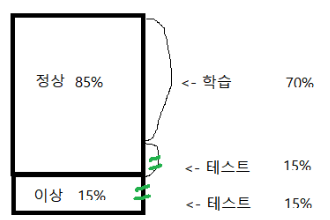

## CorrMat확인
변수 간 선형 상관성을 확인하였음.

In [ ]:
from scipy.io import loadmat
from sklearn.covariance import EllipticEnvelope
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


import itertools
from sklearn.metrics import silhouette_score
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import seaborn as sns
sns.set_style('white')

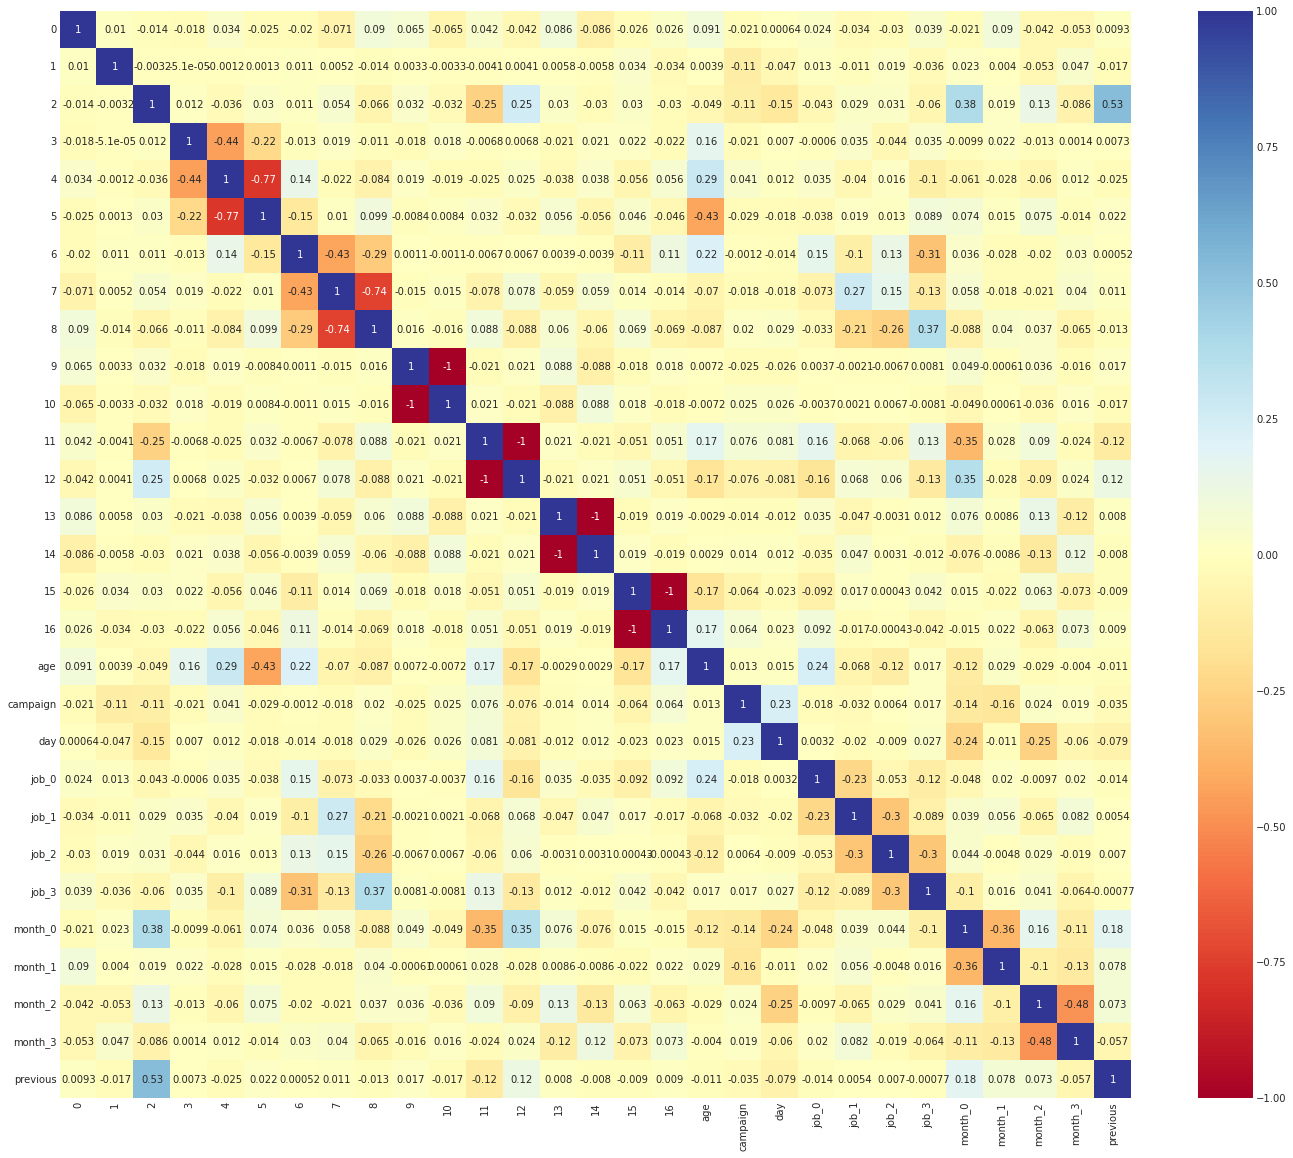

In [ ]:
plt.figure(figsize=(24, 20))
sns.heatmap(X_train.corr(), annot = True, cmap = 'RdYlBu')
plt.show()

In [ ]:
X_train.columns

Index([         0,          1,          2,          3,          4,          5,
                6,          7,          8,          9,         10,         11,
               12,         13,         14,         15,         16,      'age',
       'campaign',      'day',    'job_0',    'job_1',    'job_2',    'job_3',
        'month_0',  'month_1',  'month_2',  'month_3', 'previous'],
      dtype='object')

3&4(-0.44)/ -> 3 제거

4&5(-0.77)/ -> 5 제거

6&7(-0.43/ -> 7 제거

7&8(-0.74)/ -> 7 제거

9&10(-1)/ -> 9 제거

11&12(-1)/ -> 11 제거

13&14(-1)/ -> 13 제거

month_0&month_1(-0.36)/ -> month_0 제거

month_2&month_3(-0.48)/ -> month_2 제거

2&previous(0.53)/

5&age(-0.43)/ -> 5 제거

11&month_0(-0.35)/  -> 11 제거

12&month_0(0.35)/  -> month_0 제거

2&month_0(0.38)/ -> month_0 제거

6&job_3(-0.31)/

8&job_3(0.37)

In [ ]:
# 선형 상관성 존재하는 변수들 제거
X_train_lowcorr = X_train.drop([3, 5, 7, 9, 11, 13, 15, 'month_0', 'month_2'], axis=1)
X_train_lowcorr

0         1          2    4    6    8   10   12   14   16  age  \
4513  -0.313533  1.394495   0.000000  1.0  0.0  0.0  0.0  0.0  0.0  0.0   44   
4514  -0.215817  0.633028   0.000000  1.0  0.0  0.0  0.0  0.0  0.0  0.0   42   
4515  -0.219332  0.206422   0.000000  1.0  0.0  1.0  0.0  0.0  0.0  0.0   55   
4516   0.075923  0.100917   0.000000  1.0  0.0  0.0  0.0  1.0  1.0  0.0   37   
4517  -0.024605  0.417431  29.454545  1.0  0.0  0.0  0.0  1.0  1.0  0.0   34   
...         ...       ...        ...  ...  ...  ...  ...  ...  ...  ...  ...   
26389 -0.331810 -0.532110   0.000000  0.0  0.0  1.0  0.0  0.0  0.0  0.0   27   
26390  0.238313  0.293578   0.000000  1.0  0.0  0.0  0.0  1.0  0.0  0.0   31   
26391 -0.188401 -0.022936   0.000000  1.0  0.0  0.0  0.0  1.0  0.0  1.0   36   
26392 -0.153954 -0.353211   0.000000  1.0  0.0  1.0  0.0  1.0  1.0  0.0   43   
26393  0.217926 -0.417431   0.000000  1.0  1.0  0.0  0.0  0.0  1.0  0.0   48   

       campaign  day  job_0  job_1  job_2  job_3  month_1  month_3  previous  
4513          1   25      0      1      0      0        0        0         0  
4514          5   16      0      0      1      1        0        1         0  
4515          2   11      0      0      0      1        0        0         0  
4516          4   23      0      1      0      1        0        1         0  
4517          1    9      0      1      1      0        0        1         1  
...         ...  ...    ...    ...    ...    ...      ...      ...       ...  
26389         2    3      0      1      1      0        1        1         0  
26390         1   23      0      0      1      0        1        0         0  
26391         4   18      1      0      0      0        1        0         0  
26392         3   15      0      0      0      1        0        1         0  
26393         2    6      0      0      1      0        0        0         0  

[21881 rows x 20 columns]

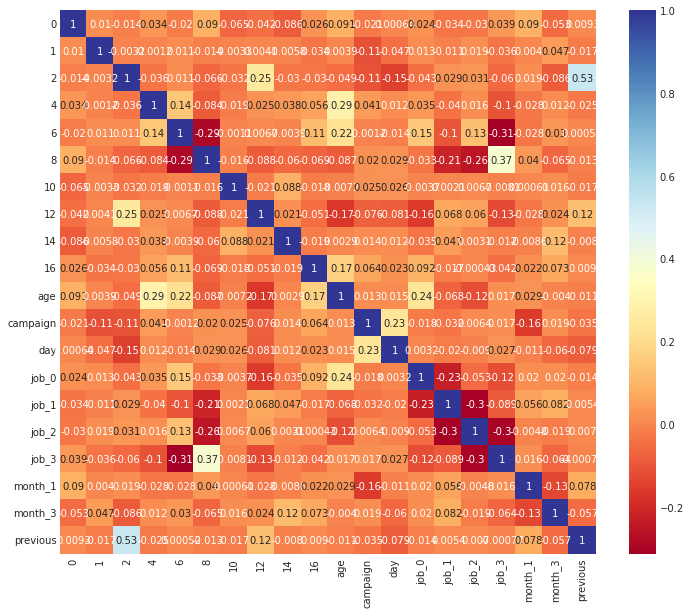

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(X_train_lowcorr.corr(), annot = True, cmap = 'RdYlBu')
plt.show()

In [ ]:
X_test_lowcorr = X_test.drop([3, 5, 7, 9, 11, 13, 15, 'month_0', 'month_2'], axis=1)
X_test_lowcorr

0         1          2    4    6    8   10   12   14   16  age  \
0      4.426714 -0.064220   0.000000  1.0  0.0  1.0  0.0  0.0  0.0  0.0   55   
1      3.034095  0.178899  30.909091  1.0  0.0  0.0  0.0  1.0  1.0  0.0   33   
2     -0.150439 -0.614679   0.000000  1.0  0.0  1.0  0.0  1.0  0.0  0.0   31   
3      0.855536 -0.536697   0.000000  1.0  0.0  0.0  0.0  0.0  0.0  0.0   60   
4     -0.231986 -0.417431   0.000000  1.0  0.0  1.0  0.0  1.0  1.0  0.0   32   
...         ...       ...        ...  ...  ...  ...  ...  ...  ...  ...  ...   
30900  1.671002  0.545872   3.727273  1.0  0.0  0.0  0.0  0.0  0.0  0.0   73   
30901  0.022496  0.940367   0.000000  0.0  0.0  0.0  0.0  0.0  1.0  0.0   25   
30902  0.247452  3.651376   0.000000  1.0  0.0  1.0  0.0  0.0  0.0  0.0   51   
30903  0.882953  1.261468   0.000000  0.0  1.0  0.0  0.0  0.0  0.0  0.0   71   
30904  3.685062  4.339450  16.818182  1.0  0.0  0.0  0.0  0.0  0.0  0.0   72   

       campaign  day  job_0  job_1  job_2  job_3  month_1  month_3  previous  
0             1   27      0      0      0      1        0        1         0  
1             1   11      0      1      0      0        0        0         4  
2             1    7      1      0      1      0        0        0         0  
3            11   28      1      0      1      0        0        0         0  
4             1   18      0      0      1      0        0        0         0  
...         ...  ...    ...    ...    ...    ...      ...      ...       ...  
30900         1   17      1      0      0      1        1        0         8  
30901         2   17      0      0      1      1        1        0         0  
30902         3   17      0      0      1      1        1        0         0  
30903         2   17      1      0      0      1        1        0         0  
30904         5   17      1      0      0      1        1        0         3  

[9026 rows x 20 columns]

## 적용 전 데이터 분포 확인

In [ ]:
X_data = pd.concat([X_train_lowcorr, X_test_lowcorr]).reset_index(drop=True)
X_data

0         1          2    4    6    8   10   12   14   16  age  \
0     -0.313533  1.394495   0.000000  1.0  0.0  0.0  0.0  0.0  0.0  0.0   44   
1     -0.215817  0.633028   0.000000  1.0  0.0  0.0  0.0  0.0  0.0  0.0   42   
2     -0.219332  0.206422   0.000000  1.0  0.0  1.0  0.0  0.0  0.0  0.0   55   
3      0.075923  0.100917   0.000000  1.0  0.0  0.0  0.0  1.0  1.0  0.0   37   
4     -0.024605  0.417431  29.454545  1.0  0.0  0.0  0.0  1.0  1.0  0.0   34   
...         ...       ...        ...  ...  ...  ...  ...  ...  ...  ...  ...   
30902  1.671002  0.545872   3.727273  1.0  0.0  0.0  0.0  0.0  0.0  0.0   73   
30903  0.022496  0.940367   0.000000  0.0  0.0  0.0  0.0  0.0  1.0  0.0   25   
30904  0.247452  3.651376   0.000000  1.0  0.0  1.0  0.0  0.0  0.0  0.0   51   
30905  0.882953  1.261468   0.000000  0.0  1.0  0.0  0.0  0.0  0.0  0.0   71   
30906  3.685062  4.339450  16.818182  1.0  0.0  0.0  0.0  0.0  0.0  0.0   72   

       campaign  day  job_0  job_1  job_2  job_3  month_1  month_3  previous  
0             1   25      0      1      0      0        0        0         0  
1             5   16      0      0      1      1        0        1         0  
2             2   11      0      0      0      1        0        0         0  
3             4   23      0      1      0      1        0        1         0  
4             1    9      0      1      1      0        0        1         1  
...         ...  ...    ...    ...    ...    ...      ...      ...       ...  
30902         1   17      1      0      0      1        1        0         8  
30903         2   17      0      0      1      1        1        0         0  
30904         3   17      0      0      1      1        1        0         0  
30905         2   17      1      0      0      1        1        0         0  
30906         5   17      1      0      0      1        1        0         3  

[30907 rows x 20 columns]

In [ ]:
X_data.columns

Index([         0,          1,          2,          4,          6,          8,
               10,         12,         14,         16,      'age', 'campaign',
            'day',    'job_0',    'job_1',    'job_2',    'job_3',  'month_1',
        'month_3', 'previous'],
      dtype='object')

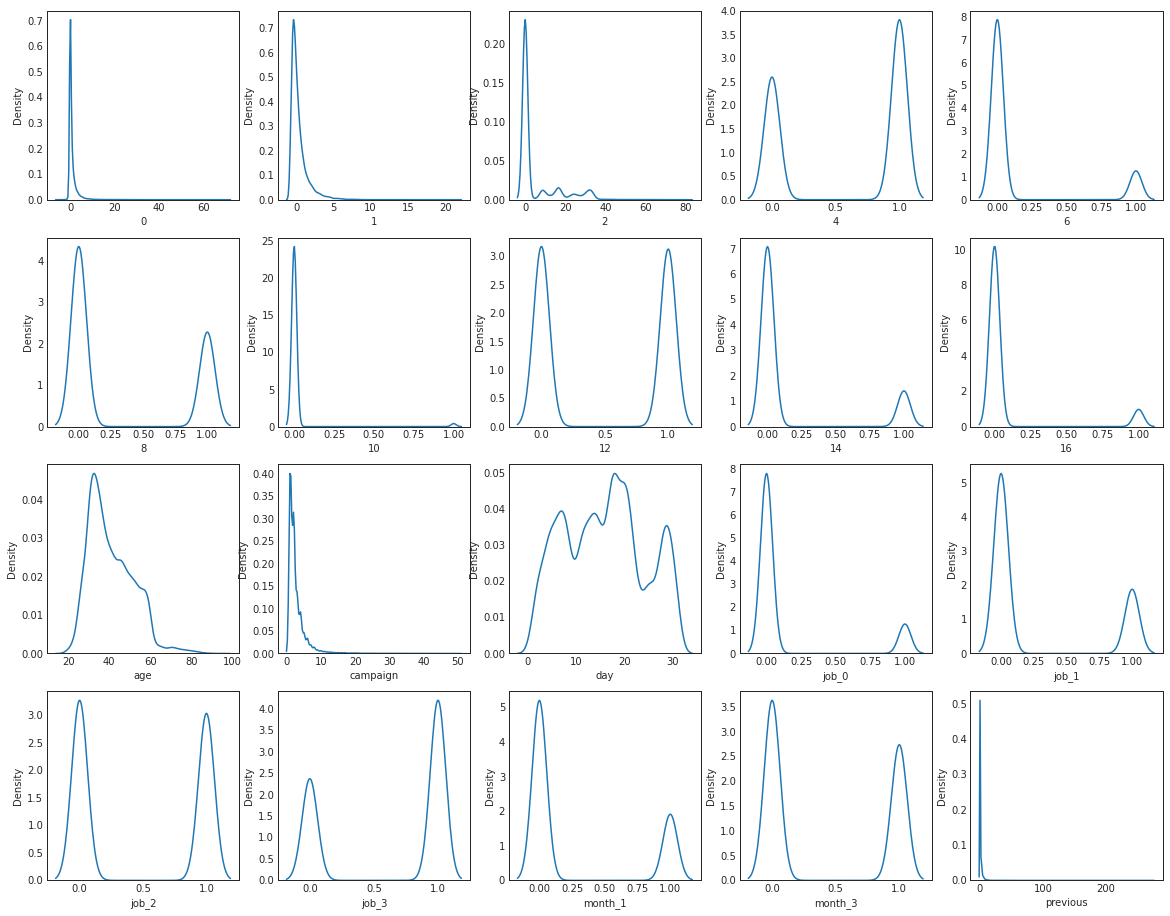

In [ ]:
fig, ax = plt.subplots(ncols=5, nrows=4, figsize=(20,16))

i = 0
j = 0

for column in X_data.columns:
  sns.kdeplot(X_data[column], ax=ax[j,i])
  if i/4 < 1:
    i += 1
  else:
    j += 1
    i = 0

GDE는 애초에 single gaussian distribution을 따른다는 가정이 있어야 하므로, 높은 적합도를 보일 것 같지 않음.

In [ ]:
# gaussian 분포를 이용해 Outlier를 검출 모델
gde = EllipticEnvelope()
# 모델 fit
gde.fit(X_train_lowcorr)

EllipticEnvelope()

In [ ]:
# FRR, FAR, F1 score 도출
def calculate_metric(y_true, y_pred):
    con_mat = confusion_matrix(y_true, y_pred, labels=[1, 0])
    tp, fn, fp, tn = con_mat.ravel()
    
    frr = fp / (fp + tn) # 정상인 걸 얼마나 틀렸나 #FPR 같은
    far = fn / (fn + tp) # 비정상인 걸 얼마나 틀렸는 지 # FNR 같은
    
    f1 = f1_score(y_true, y_pred)
    
    return frr, far, f1

In [ ]:
trainset = pd.concat([X_train_lowcorr, Y_train],axis = 1)
testset = pd.concat([X_test_lowcorr, Y_test],axis = 1)
dataset = pd.concat([trainset, testset],axis = 0)

Normal = dataset.loc[dataset['y'] == 0]
Anomaly = dataset.loc[dataset['y'] == 1]

# kNN

https://medium.com/dataman-in-ai/anomaly-detection-with-pyod-b523fc47db9

## 추가 표준화
거리 기반 알고리즘이라 연속적인 데이터에 추가적인 표준화 진행하였음.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
tmp = dataset.iloc[:,:-1][['age', 'campaign', 'day', 'previous']]
tmp

age  campaign  day  previous
4513    44         1   25         0
4514    42         5   16         0
4515    55         2   11         0
4516    37         4   23         0
4517    34         1    9         1
...    ...       ...  ...       ...
30900   73         1   17         8
30901   25         2   17         0
30902   51         3   17         0
30903   71         2   17         0
30904   72         5   17         3

[30907 rows x 4 columns]

In [ ]:
scaler = StandardScaler() # 인덱스 강제로 초기화됨
scaler = MinMaxScaler()
tmp = scaler.fit_transform(tmp)
tmp = pd.DataFrame(tmp)
tmp.columns = ['age', 'campaign', 'day', 'previous']
tmp

age  campaign       day  previous
0      0.337662  0.000000  0.800000  0.000000
1      0.311688  0.081633  0.500000  0.000000
2      0.480519  0.020408  0.333333  0.000000
3      0.246753  0.061224  0.733333  0.000000
4      0.207792  0.000000  0.266667  0.003636
...         ...       ...       ...       ...
30902  0.714286  0.000000  0.533333  0.029091
30903  0.090909  0.020408  0.533333  0.000000
30904  0.428571  0.040816  0.533333  0.000000
30905  0.688312  0.020408  0.533333  0.000000
30906  0.701299  0.081633  0.533333  0.010909

[30907 rows x 4 columns]

In [ ]:
dataset.columns

Index([         0,          1,          2,          4,          6,          8,
               10,         12,         14,         16,      'age', 'campaign',
            'day',    'job_0',    'job_1',    'job_2',    'job_3',  'month_1',
        'month_3', 'previous',        'y'],
      dtype='object')

In [ ]:
tmp2 = dataset.drop(['age', 'campaign', 'day', 'previous'], axis=1)
tmp2 = tmp2.reset_index(drop=True)  # 인덱스 초기화

tmp3 = pd.concat([tmp, tmp2], axis = 1) # 추가 표준화시킨 데이터

In [ ]:
# train과 test data를 0.75 : 0.25 비율로 나눈다.
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(
    tmp3.iloc[:,:-1], tmp3.iloc[:,-1], random_state=3)

In [ ]:
tmp3.to_csv("preprocessed.csv", index = False)

### 결과

In [ ]:
X_train_knn

age  campaign       day  previous         0         1          2  \
4445   0.441558  0.000000  0.300000  0.000000 -0.405624 -0.261468   0.000000   
18469  0.233766  0.000000  0.366667  0.007273  0.150439 -0.633028  31.636364   
27064  0.519481  0.000000  1.000000  0.000000  1.943058  1.990826   0.000000   
25937  0.298701  0.000000  0.500000  0.000000  2.878032 -0.344037   0.000000   
29895  0.129870  0.061224  0.466667  0.000000  0.765554  2.192661   0.000000   
...         ...       ...       ...       ...       ...       ...        ...   
15288  0.168831  0.020408  0.433333  0.036364 -0.168717  0.275229  33.272727   
26243  0.545455  0.000000  1.000000  0.000000  4.824605  1.435780   0.000000   
11513  0.740260  0.000000  0.033333  0.000000  2.004218 -0.146789   0.000000   
1688   0.142857  0.061224  0.666667  0.000000 -0.020387 -0.233945   0.000000   
5994   0.350649  0.000000  0.600000  0.000000 -0.276274 -0.110092   0.000000   

         4    6    8   10   12   14   16  job_0  job_1  job_2  job_3  month_1  \
4445   1.0  1.0  0.0  0.0  0.0  1.0  0.0      0      1      1      1        0   
18469  0.0  0.0  1.0  0.0  1.0  0.0  0.0      0      0      0      1        0   
27064  0.0  0.0  1.0  0.0  0.0  0.0  1.0      1      0      0      1        0   
25937  0.0  0.0  1.0  0.0  1.0  1.0  0.0      0      0      0      1        0   
29895  0.0  0.0  1.0  0.0  0.0  0.0  0.0      1      0      1      1        1   
...    ...  ...  ...  ...  ...  ...  ...    ...    ...    ...    ...      ...   
15288  1.0  0.0  1.0  0.0  1.0  0.0  0.0      0      0      0      1        0   
26243  1.0  0.0  0.0  0.0  0.0  0.0  0.0      0      1      0      1        0   
11513  1.0  1.0  0.0  0.0  0.0  0.0  0.0      1      0      0      1        1   
1688   1.0  0.0  0.0  0.0  1.0  0.0  0.0      0      0      1      1        0   
5994   1.0  0.0  1.0  0.0  0.0  1.0  0.0      0      0      0      1        1   

       month_3  
4445         1  
18469        0  
27064        1  
25937        1  
29895        1  
...        ...  
15288        0  
26243        0  
11513        1  
1688         1  
5994         0  

[23180 rows x 20 columns]

In [ ]:
X_test_knn

age  campaign       day  previous         0         1          2  \
8145   0.181818  0.000000  0.600000  0.000000 -0.143409  0.252294   0.000000   
30421  0.194805  0.000000  0.400000  0.003636  1.046749  0.834862  16.545455   
18116  0.532468  0.020408  0.933333  0.000000 -0.069596  0.417431   0.000000   
10435  0.207792  0.040816  0.633333  0.000000  0.738840 -0.568807   0.000000   
1407   0.428571  0.020408  0.933333  0.000000 -0.185589 -0.316514   0.000000   
...         ...       ...       ...       ...       ...       ...        ...   
215    0.168831  0.020408  0.066667  0.000000  0.199649  0.743119   0.000000   
26419  0.103896  0.000000  0.233333  0.000000  0.054833  1.605505   0.000000   
8331   0.181818  0.020408  0.666667  0.000000  3.016520 -0.513761   0.000000   
18483  0.103896  0.000000  0.833333  0.003636  1.839719  0.908257  30.909091   
5341   0.493506  0.000000  0.233333  0.000000 -0.209490  0.032110   0.000000   

         4    6    8   10   12   14   16  job_0  job_1  job_2  job_3  month_1  \
8145   1.0  0.0  0.0  0.0  1.0  0.0  0.0      0      1      0      1        1   
30421  0.0  0.0  1.0  0.0  0.0  0.0  0.0      0      0      0      1        0   
18116  1.0  0.0  0.0  0.0  0.0  0.0  0.0      1      0      0      1        0   
10435  1.0  1.0  0.0  0.0  1.0  0.0  0.0      0      0      1      0        1   
1407   1.0  0.0  1.0  0.0  0.0  0.0  0.0      0      1      1      1        0   
...    ...  ...  ...  ...  ...  ...  ...    ...    ...    ...    ...      ...   
215    0.0  0.0  0.0  0.0  0.0  0.0  0.0      0      1      0      1        1   
26419  0.0  0.0  0.0  0.0  0.0  0.0  0.0      1      0      1      0        0   
8331   1.0  0.0  0.0  0.0  0.0  0.0  1.0      0      1      0      1        1   
18483  0.0  0.0  0.0  0.0  0.0  0.0  0.0      1      0      1      1        0   
5341   1.0  1.0  0.0  0.0  0.0  1.0  0.0      0      0      1      0        0   

       month_3  
8145         0  
30421        1  
18116        0  
10435        0  
1407         1  
...        ...  
215          1  
26419        1  
8331         0  
18483        1  
5341         1  

[7727 rows x 20 columns]

In [ ]:
y_train_knn

4445     0
18469    0
27064    1
25937    0
29895    1
        ..
15288    0
26243    0
11513    0
1688     0
5994     0
Name: y, Length: 23180, dtype: int64

In [ ]:
y_test_knn

8145     0
30421    1
18116    0
10435    0
1407     0
        ..
215      0
26419    1
8331     0
18483    0
5341     0
Name: y, Length: 7727, dtype: int64

## 적절 parameter 찾기
CV를 하므로 오래걸리는 작업이다. 처음 한 번만 실행하였음.

In [ ]:
#Hyperparameter
grid_params = { 'n_neighbors' : [3,5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [ ]:
# CV라 매우 오래 걸림
# gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)
# g_res = gs.fit(X_train_knn, y_train_knn)

In [ ]:
# g_res.best_score_

In [ ]:
# g_res.best_params_

train set 결과 : 0.8588007846455611

GridCV 결과, <br>
n_neighbors = 11, <br>
weights = 'uniform',<br>
metric = 'minkowski'<br>
의 경우, 정확도가 좋았다고 나왔다.

## 모델 구축

In [ ]:
# 값을 직접 입력
# algorithm = 'brute'
knn = KNeighborsClassifier(n_neighbors = 11, weights = 'uniform', metric = 'minkowski')
knn.fit(X_train_knn, y_train_knn)

KNeighborsClassifier(n_neighbors=11)

In [ ]:
# KNN 예측
KNN_train_pred = knn.predict(X_train_knn)
KNN_test_pred = knn.predict(X_test_knn)

In [ ]:
#train, test 정확도 확인
print('Training set accuracy: ', metrics.accuracy_score(y_train_knn, KNN_train_pred))
print('Test set accuracy: ',metrics.accuracy_score(y_test_knn, KNN_test_pred))

Training set accuracy:  0.8869283865401207
Test set accuracy:  0.8709719166558819


뭐.. accuracy는 적당히 잘 나온다

### 성능 평가

Text(0.5, 18.5, 'Predicted')

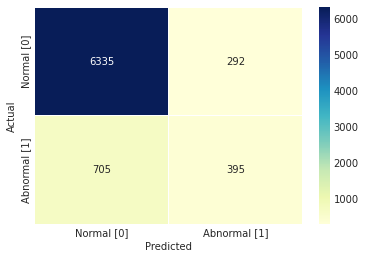

In [ ]:
# Confusion matrix 출력 및 모델 성능 평가
con_mat = confusion_matrix(y_test_knn, KNN_test_pred)

sns.heatmap(pd.DataFrame(con_mat, columns = ['Predicted', 'Actual']),
            xticklabels=['Normal [0]', 'Abnormal [1]'], 
            yticklabels=['Normal [0]', 'Abnormal [1]'], 
            annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [ ]:
# test 평가
frr, far, f1 = calculate_metric(y_test_knn, KNN_test_pred)

print("**  FRR: {}  |  FAR: {}  |  F1 Score: {}".format(round(frr, 4), round(far, 4), round(f1, 4)))

**  FRR: 0.0441  |  FAR: 0.6409  |  F1 Score: 0.4421


FAR값이 너무 높다. (실제 이상인데 정상으로 해버림) <br>
F1값도 낮은 수준. <br>
그래서, threshold를 잡아준다.

---------------------------

### threshold 새로 잡기
95%선까지 자르기로 했다.

In [125]:
print("Train data의 Y 비율 --> 정상[0]: {}, 비정상[1]: {}" .format(sum(y_train_knn == 0), sum(y_train_knn == 1)))

Train data의 Y 비율 --> 정상[0]: 19767, 비정상[1]: 3413


In [127]:
# 모델에서 k-neighbors의 거리 및 인덱스 출력 
distances, indexes = knn.kneighbors(X_train_knn)

In [128]:
# 각 관측치의 k-distances 평균에 대한 플롯 평균 
# plt.figure(figsize=(20,20))
# plt.plot(distances.mean(axis =1))

In [129]:
# pd.DataFrame(distances.mean(axis =1)).describe()

In [130]:
np.percentile(distances.mean(axis =1), 85, interpolation='nearest')

26.481671358631854

In [131]:
# 컷오프 값 우측 5% 결정
right_five_percent = np.percentile(distances.mean(axis =1), 85, interpolation='nearest')
outlier_index = np.where(distances.mean(axis = 1) > right_five_percent) 
print("이상치 갯수 :", len(outlier_index[0]))

이상치 갯수 : 3477


In [132]:
# 이상값 추출
outlier_values_knn = dataset.iloc[outlier_index]
print("이상치 판별 중 실제 이상치 갯수 :", sum(outlier_values_knn['y'] == 1))

이상치 판별 중 실제 이상치 갯수 : 0


threshold를 잡으니 오히려 전혀 이상치 추출을 못함. <br>
이상치를 추출해서 실제 label을 확인했는데 다 정상데이터임.  <br>
--> 거리가 큰 관측치들이 정상이면.. 거리 계산이 잘못?

### 스케일링 안 한 데이터로 재구축

In [ ]:
# train과 test data를 0.75 : 0.25 비율로 나눈다.
X_train_knn_nonscaled, X_test_knn_nonscaled, y_train_knn_nonscaled, y_test_knn_nonscaled = train_test_split( dataset.iloc[:,:-1], dataset.iloc[:,-1], random_state=3)

Text(0.5, 18.5, 'Predicted')

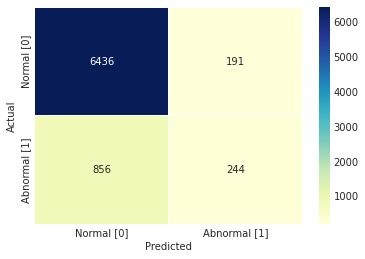

In [ ]:
knn.fit(X_train_knn_nonscaled, y_train_knn_nonscaled)
KNN_test_pred_nonscaled = knn.predict(X_test_knn_nonscaled)

# Confusion matrix 출력 및 모델 성능 평가
con_mat = confusion_matrix(y_test_knn_nonscaled, KNN_test_pred_nonscaled)

sns.heatmap(pd.DataFrame(con_mat, columns = ['Predicted', 'Actual']),
            xticklabels=['Normal [0]', 'Abnormal [1]'], 
            yticklabels=['Normal [0]', 'Abnormal [1]'], 
            annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [ ]:
# test 평가
frr, far, f1 = calculate_metric(y_test_knn_nonscaled, KNN_test_pred_nonscaled)

print("**  FRR: {}  |  FAR: {}  |  F1 Score: {}".format(round(frr, 4), round(far, 4), round(f1, 4)))

**  FRR: 0.0288  |  FAR: 0.7782  |  F1 Score: 0.3179


더 별로네

#K-means

## 데이터 준비
test, train set 분리 안 하고 진행함.

In [ ]:
X_dataset_kmeans = tmp3.iloc[:,:-1]
Y_dataset_kmeans = tmp3.iloc[:,-1]

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fc3a10b7cd0>,
                 estimator=KMeans(n_clusters=9), k=(1, 10))

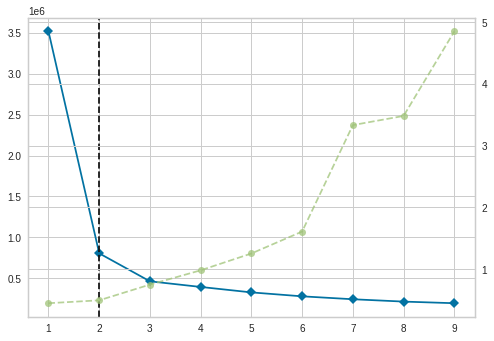

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(X_dataset_kmeans)

elbow point = 2 인 것으로 확인. <br>
우선, k=2로 모델을 적합시켜보았다.

## 모델 구축

In [ ]:
# 모델 구축
from sklearn.cluster import KMeans

k = 2
kmeans_result = pd.DataFrame()

model = KMeans(n_clusters = k, random_state = 10)   # 그룹 수, random_state 설정
model.fit(X_dataset_kmeans)
kmeans_result['cluster'] = model.fit_predict(X_dataset_kmeans) # 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장

### 거리정보 계산
k-means에서는 거리정보가 곧 novelty score.

In [ ]:
# 거리(norm 2) 구하는 알고리즘.
import math

def sqrt_cal(i, j):
  sum = 0
  for k in range(len(model.cluster_centers_[i])):
    zegop = (model.cluster_centers_[i][k] - np.array(X_dataset_kmeans.loc[j])[k]) ** 2
    sum += zegop
  return math.sqrt(sum)

In [ ]:
# arr는 각 군집 centroid와 관측치 간 거리 정보. = novelty score
# 계산 오래걸림

arr = []

for i in range(k):
  for j in range(len(kmeans_result['cluster'])):
    if (kmeans_result['cluster'].loc[j] == i):
      arr.append(sqrt_cal(i, j))

print(arr)
# i label을 가진 j행 data임.

[2.139219240559901, 1.6429506667580285, 1.6863695011083293, 1.8777916395025045, 2.1576812360061974, 1.8539037352468308, 9.105573168041696, 2.3271193228521616, 3.6114638456593973, 1.8441658163355015, 2.1839543596682014, 2.079569207970933, 1.8733265414268498, 1.9767568253732855, 1.8903431416183558, 3.923963680522485, 2.1844343950391143, 2.5709399222777285, 3.3569817190721145, 2.4299257372279346, 1.6501599166573189, 1.8165232043360806, 1.5204209455338165, 2.1243809393716226, 1.949898599832442, 1.7845385239678953, 1.9115199419317102, 1.9336349801704722, 1.9600753691162929, 2.01603456657385, 2.0290625447446455, 2.166061459486409, 2.0094046115514916, 2.1664962925402858, 1.757056111192045, 2.0760434129337293, 1.984168241534712, 2.1410879030221053, 2.139951979282491, 11.516775944129837, 2.047530817767381, 2.113768692248962, 2.1387947194924055, 2.9523611502628637, 2.427455946226221, 2.049180457152836, 1.8219872939631359, 2.580446735704449, 7.577479441446932, 2.524275516367925, 1.902126980091613

In [ ]:
# 거리정보 result에 추가
kmeans_result[1] = arr
kmeans_result.columns = ['cluster', 'distance']
kmeans_result

cluster  distance
0            0  2.139219
1            0  1.642951
2            0  1.686370
3            0  1.877792
4            1  2.157681
...        ...       ...
30902        0  7.641588
30903        0  8.260111
30904        0  7.724729
30905        0  7.980785
30906        1  9.420728

[30907 rows x 2 columns]

### 컷오프

In [ ]:
# 컷오프 값 우측 15% 결정
right_five_percent_kmeans = np.percentile(kmeans_result['distance'], 85, interpolation='nearest')
outlier_index_kmeans = np.where(kmeans_result['distance'] > right_five_percent_kmeans) 
print("이상치 갯수 :", len(outlier_index_kmeans[0]))

이상치 갯수 : 4636


In [ ]:
# 예측 정보를 result에 저장.
tmp = [0 for j in range(30907)]
for i in outlier_index_kmeans[0]:
  tmp[i] = 1

kmeans_result['predict'] = tmp

### 성능 평가

Text(0.5, 28.5, 'Predicted')

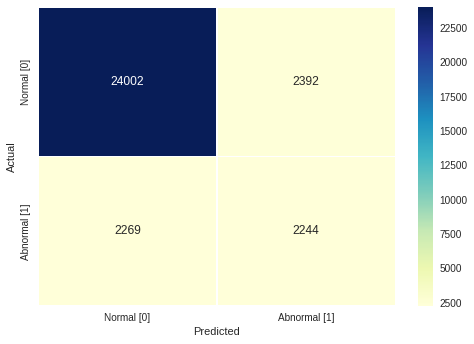

In [ ]:
# Confusion matrix 출력 및 모델 성능 평가
con_mat = confusion_matrix(Y_dataset_kmeans, kmeans_result['predict'])

sns.heatmap(pd.DataFrame(con_mat, columns = ['Predicted', 'Actual']),
            xticklabels=['Normal [0]', 'Abnormal [1]'], 
            yticklabels=['Normal [0]', 'Abnormal [1]'], 
            annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [ ]:
# 알고리즘 평가
frr, far, f1 = calculate_metric(Y_dataset_kmeans, kmeans_result['predict'])
print("**  FRR: {}  |  FAR: {}  |  F1 Score: {}" .format(round(frr, 4), round(far, 4), round(f1, 4)))

**  FRR: 0.0906  |  FAR: 0.5028  |  F1 Score: 0.4905


  FRR: 0.0906  <br>  FAR: 0.5028  <br>  F1 Score: 0.4905 <br>
  

In [ ]:
Y_dataset_kmeans.value_counts()

0    26394
1     4513
Name: y, dtype: int64

# DBSCAN
밀도 기반 클러스터링 기법이다.

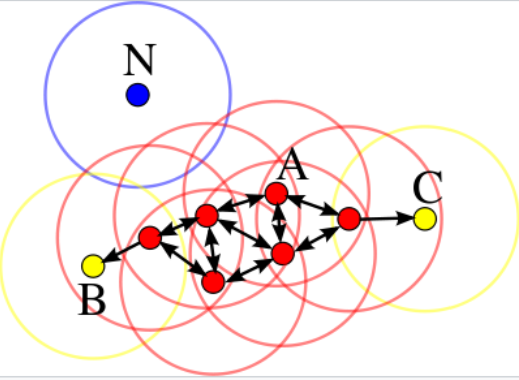

1. minPts 및 eps를 정의한다.
2. 시작 포인트는 반경 eps를 사용하여 결정된 인접 영역에서 무작위로 선택된다. 인접 포인트에 최소 minPts에서 정의한 수의 포인트가 있으면 해당 포인트가 핵심 포인트로 표시되고 클러스터 형성을 시작한다. 그렇지 않은 경우의 포인트는 노이즈로 표시된다. 클러스터 형성이 시작되면(클러스터 A라고 가정) 초기 포인트 근처에 있는 모든 포인트가 클러스터 A의 일부가 된다. 이러한 새 포인트가 핵심 포인트인 경우 근처에있는 포인트도 클러스터 A에 추가된다.(Note. 노이즈로 표시된 포인트도 다시 클러스터의 일부가 될 수 있다.)
3. 다음 단계는 이전 단계에서 정의하지 않은 포인트 중에서 무작위로 다른 포인트를 선택하는 것이다. 그런 다음 동일한 절차가 적용된다.(Note. 이러한 단계를 적용함으로써 DBSCAN 알고리즘은 고밀도 영역을 찾아 저밀도 영역과 분리 할 수 ​​있게 된다.)
4. 모든 포인트가 다 정의되고 나면 과정이 완료된다.

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
X_dataset_dbscan = tmp3.iloc[:,:-1] # X데이터. split 안 함.
Y_dataset_dbscan = tmp3.iloc[:,-1]  # Y데이터, split 안 함. (평가에 쓰일 예정)

In [ ]:
dbscan = DBSCAN(eps=2.5, min_samples=7).fit(X_dataset_dbscan)

In [ ]:
labels = dbscan.labels_
pd.Series(labels).value_counts()

 0    30674
-1      222
 1       11
dtype: int64

In [ ]:
for i in [1.3, 1.4, 1.5]:
  for j in [17]:
    dbscan = DBSCAN(eps=i, min_samples=j).fit(X_dataset_dbscan)
    labels = dbscan.labels_
    print(pd.Series(labels).value_counts())
    print("i : {}, j : {} \n" .format(i, j))

 0     21424
-1      6258
 2      1470
 3       583
 1       516
 4       491
 7        47
 5        45
 6        25
 8        18
 10       17
 9        13
dtype: int64
i : 1.3, j : 17 

 0    21798
-1     5197
 1     2239
 2      901
 3      746
 4       26
dtype: int64
i : 1.4, j : 17 

 0    22308
-1     3788
 1     2532
 3     1213
 2      988
 4       78
dtype: int64
i : 1.5, j : 17 



In [ ]:
# 1.5, 17로 진행
dbscan = DBSCAN(eps=1.5, min_samples=17).fit(X_dataset_dbscan)
labels = dbscan.labels_
labels

array([ 0,  0,  0, ...,  0,  0, -1])

In [ ]:
for i in range(len(labels)):
  if(labels[i] >= 1):
    labels[i] = 1
  else:
    labels[i] = 0

Text(0.5, 28.5, 'Predicted')

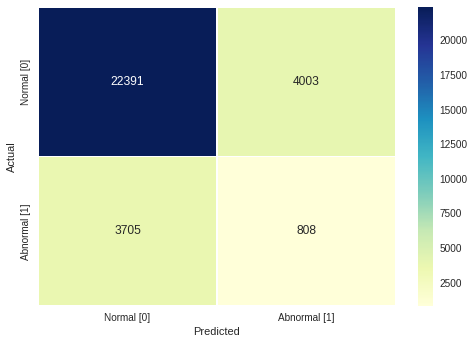

In [ ]:
# Confusion matrix 출력 및 모델 성능 평가
con_mat = confusion_matrix(Y_dataset_dbscan, labels)

sns.heatmap(pd.DataFrame(con_mat, columns = ['Predicted', 'Actual']),
            xticklabels=['Normal [0]', 'Abnormal [1]'], 
            yticklabels=['Normal [0]', 'Abnormal [1]'], 
            annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [ ]:
# 알고리즘 평가
frr, far, f1 = calculate_metric(Y_dataset_dbscan, labels)
print("**  FRR: {}  |  FAR: {}  |  F1 Score: {}".format(round(frr, 4), round(far, 4), round(f1, 4)))

**  FRR: 0.1517  |  FAR: 0.821  |  F1 Score: 0.1733


최악이군

# Isolation Forest

데이터셋을 의사결정나무 형태로 표현. <br>
이상값은 의사결정나무 상단부에서 분리할 수 있다는 것을 이용. <br>
  - 장점 : 군집기반 알고리즘에 비해 계산량이 적음 --> 시간이 적게 걸림 <br>
  - 장점 : Robust한 모델을 만들 수 있다.

## 준비

In [ ]:
  pip install pyod

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 141 kB 34.7 MB/s 
  Created wheel for pyod: filename=pyod-1.0.6-py3-none-any.whl size=175099 sha256=d431d4f06d6dc9bf1e6804becae3aff320581c9b48dfae70fd76bb18327843c4
  Stored in directory: /root/.cache/pip/wheels/5f/24/ba/b986cd4be81d12d0d11130aed62674291bf2da1b891de49aa1
Successfully built pyod


In [ ]:
from pyod.models.iforest import IForest

In [ ]:
# train과 test data를 0.75 : 0.25 비율로 나눈다.
X_train_IForest, X_test_IForest, y_train_IForest, y_test_IForest = train_test_split(
    tmp3.iloc[:,:-1], tmp3.iloc[:,-1], random_state=3)

In [ ]:
## 원래 전처리

## 모델 구축

In [ ]:
# Isolation Forest 모델 구축
IForest = IForest()
IForest.fit(X_train_IForest)

IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

In [ ]:
# train data에 대한 예측 값(정상=0, 이상=1)
IForest_train_pred = IForest.predict(X_train_IForest) 
IForest_train_pred

array([0, 0, 1, ..., 1, 0, 0])

In [ ]:
# test data에 대한 예측 값(정상=1, 이상=-1)
IForest_test_pred = IForest.predict(X_test_IForest) 
IForest_test_pred

array([0, 0, 0, ..., 0, 0, 0])

accuracy:  0.802381260515077
recall:  0.143
precision:  0.212
f1-score:  0.171


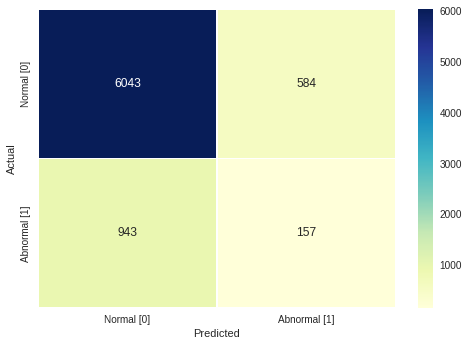

In [ ]:
# Confusion matrix 출력 및 모델 성능 평가
con_mat = confusion_matrix(y_test_IForest, IForest_test_pred)

sns.heatmap(pd.DataFrame(con_mat, columns = ['Predicted', 'Actual']),
            xticklabels=['Normal [0]', 'Abnormal [1]'], 
            yticklabels=['Normal [0]', 'Abnormal [1]'], 
            annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')

print("accuracy: ", accuracy_score(y_test_IForest, IForest_test_pred))
print("recall: ", round(recall_score(y_test_IForest, IForest_test_pred),3))
print("precision: ", round(precision_score(y_test_IForest, IForest_test_pred),3))
print("f1-score: ", round(f1_score(y_test_IForest, IForest_test_pred),3))

In [ ]:
# 알고리즘 평가
frr, far, f1 = calculate_metric(y_test_IForest, IForest_test_pred)
print("**  FRR: {}  |  FAR: {}  |  F1 Score: {}".format(round(frr, 4), round(far, 4), round(f1, 4)))

**  FRR: 0.0881  |  FAR: 0.8573  |  F1 Score: 0.1706


##새로운 코드

In [ ]:
X_dataset_IForest = tmp3.iloc[:,:-1] # X데이터. split 안 함.
Y_dataset_IForest = tmp3.iloc[:,-1]  # Y데이터, split 안 함. (평가에 쓰일 예정)

In [ ]:
from sklearn.ensemble import IsolationForest
clf=IsolationForest(n_estimators=50, max_samples=100, contamination=float(0.15), 
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=None, verbose=0)
#  behaviour="new"
# 50개의 노드 수, 최대 50개의 샘플
# 0.15%의 outlier 색출.

clf.fit(X_dataset_IForest)
pred = clf.predict(X_dataset_IForest)
X_dataset_IForest['anomaly']=pred
outliers=X_dataset_IForest.loc[X_dataset_IForest['anomaly']==-1]
outlier_index=list(outliers.index)
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(X_dataset_IForest['anomaly'].value_counts())

 1    26271
-1     4636
Name: anomaly, dtype: int64


In [ ]:
for i in range(len(X_dataset_IForest['anomaly'])):
  if (X_dataset_IForest['anomaly'][i] == 1):
    X_dataset_IForest['anomaly'][i] = 0   # 정상
  elif(X_dataset_IForest['anomaly'][i] == -1):
    X_dataset_IForest['anomaly'][i] = 1   # 이상


Text(0.5, 28.5, 'Predicted')

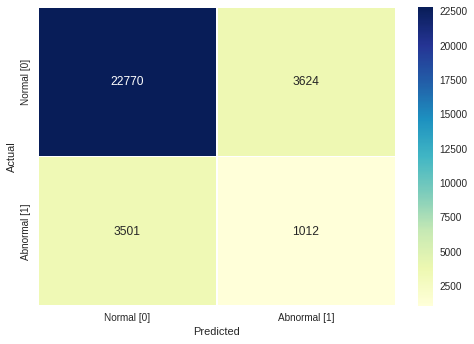

In [ ]:
# Confusion matrix 출력 및 모델 성능 평가
con_mat = confusion_matrix(Y_dataset_IForest, X_dataset_IForest['anomaly'])

sns.heatmap(pd.DataFrame(con_mat, columns = ['Predicted', 'Actual']),
            xticklabels=['Normal [0]', 'Abnormal [1]'], 
            yticklabels=['Normal [0]', 'Abnormal [1]'], 
            annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [ ]:
# 알고리즘 평가
frr, far, f1 = calculate_metric(Y_dataset_IForest, X_dataset_IForest['anomaly'])
print("**  FRR: {}  |  FAR: {}  |  F1 Score: {}".format(round(frr, 4), round(far, 4), round(f1, 4)))

**  FRR: 0.1373  |  FAR: 0.7758  |  F1 Score: 0.2212


## PCA시각화

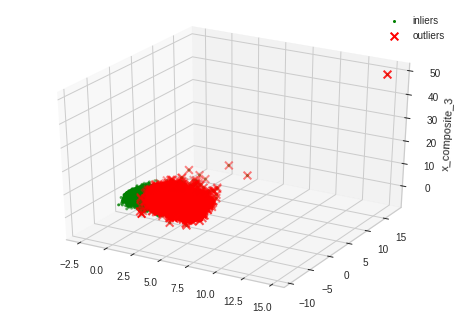

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3) 
scaler = StandardScaler()
#normalize the metrics
X_IForest = scaler.fit_transform(X_dataset_IForest)
X_reduce_IForest = pca.fit_transform(X_IForest)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")
# Plot the compressed data points
ax.scatter(X_reduce_IForest[:, 0], X_reduce_IForest[:, 1], zs=X_reduce_IForest[:, 2], s=4, lw=1, label="inliers",c="green")
# Plot x's for the ground truth outliers
ax.scatter(X_reduce_IForest[outlier_index,0],X_reduce_IForest[outlier_index,1], X_reduce_IForest[outlier_index,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
plt.show()

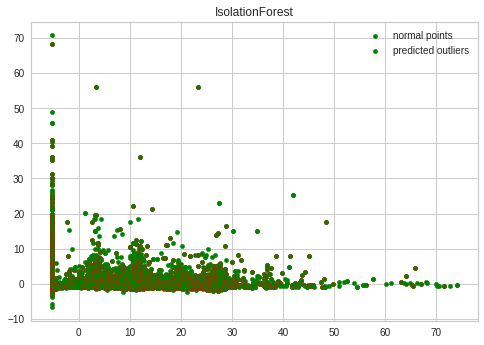

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(2)
pca.fit(X_dataset_IForest)
res=pd.DataFrame(pca.transform(X_dataset_IForest))
Z = np.array(res)
plt.title("IsolationForest")
# plt.contourf( Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(res[0], res[1], c='green',
                 s=20,label="normal points")
b1 =plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()